In [1]:
# Import necessary libraries
import pandas as pd # data manipulation
import numpy as np # numerical operations
import matplotlib.pyplot as plt # plotting
import seaborn as sns # advanced plotting

from sklearn.model_selection import train_test_split, cross_val_score # model selection
from sklearn.preprocessing import StandardScaler # feature scaling
from sklearn.linear_model import LogisticRegression # logistic regression model
from sklearn.naive_bayes import GaussianNB # naive bayes model
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score # evaluation metrics
from scipy.stats import ttest_ind # t-test
from statsmodels.stats.proportion import proportion_confint # confidence intervals for proportions


In [2]:
# Load dataset
df = pd.read_csv('diabetes.csv')
df.info()
df.head(15)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [3]:
# Replace zero values with NaN for selected columns
cols_to_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
df[cols_to_replace_zero] = df[cols_to_replace_zero].replace(0, np.nan)

# Impute with median
for col in cols_to_replace_zero:
    df[col] = df[col].fillna(df[col].median())

df.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.656250,72.386719,29.108073,140.671875,32.455208,0.471876,33.240885,0.348958
std,3.369578,30.438286,12.096642,8.791221,86.383060,6.875177,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,25.000000,121.500000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [4]:
X = df.drop('Outcome', axis=1)
y = df['Outcome']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X = pd.DataFrame(X_scaled, columns=X.columns)


In [5]:
df[['Glucose', 'BMI', 'Age']].describe()
df[['Glucose', 'BMI', 'Age']].var()


Glucose    926.489244
BMI         47.268056
Age        138.303046
dtype: float64

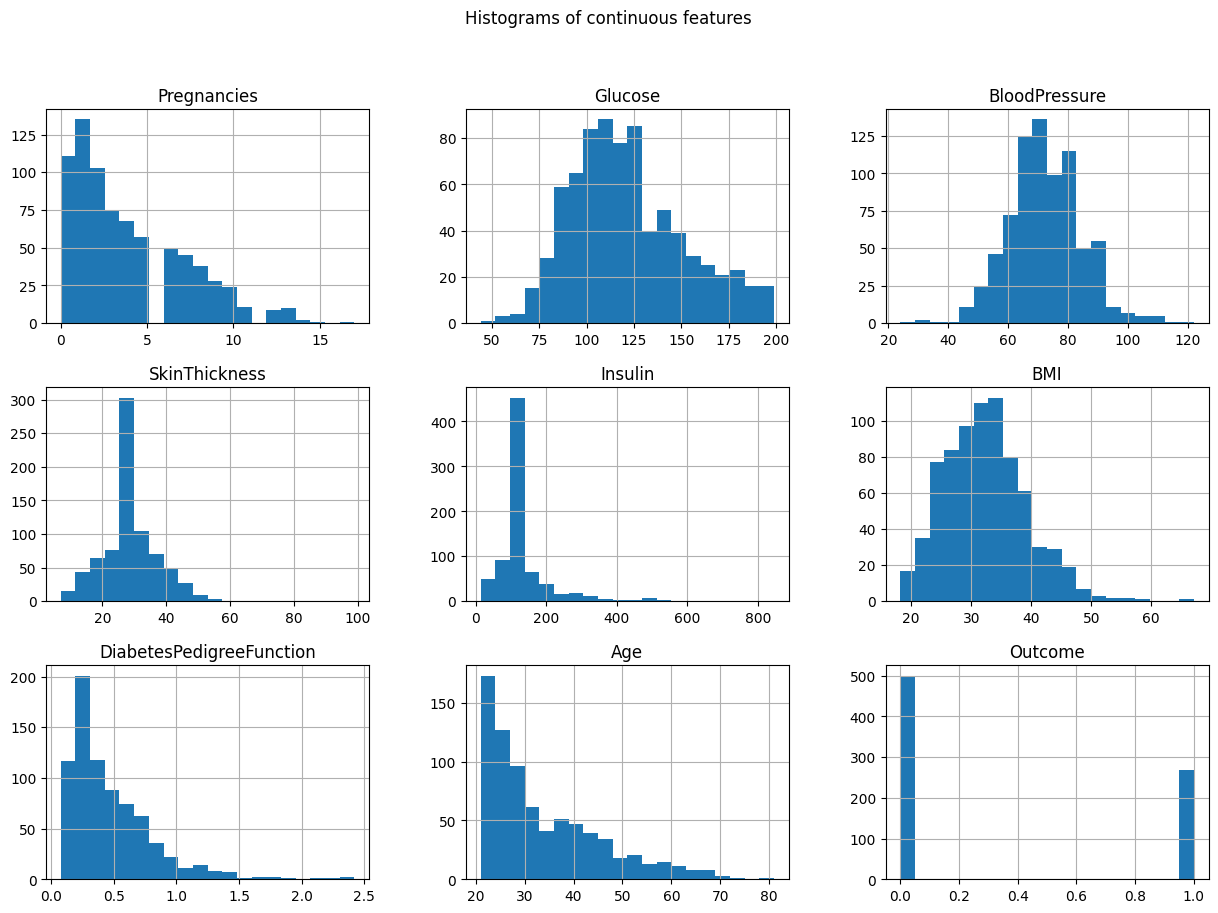

In [6]:
df.hist(bins=20, figsize=(15, 10))
plt.suptitle("Histograms of continuous features")
plt.show()


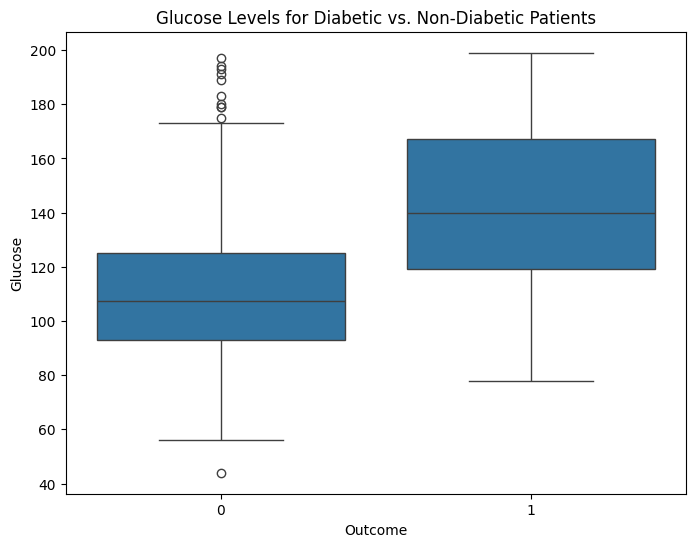

In [7]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Outcome', y='Glucose', data=df)
plt.title('Glucose Levels for Diabetic vs. Non-Diabetic Patients')
plt.show()


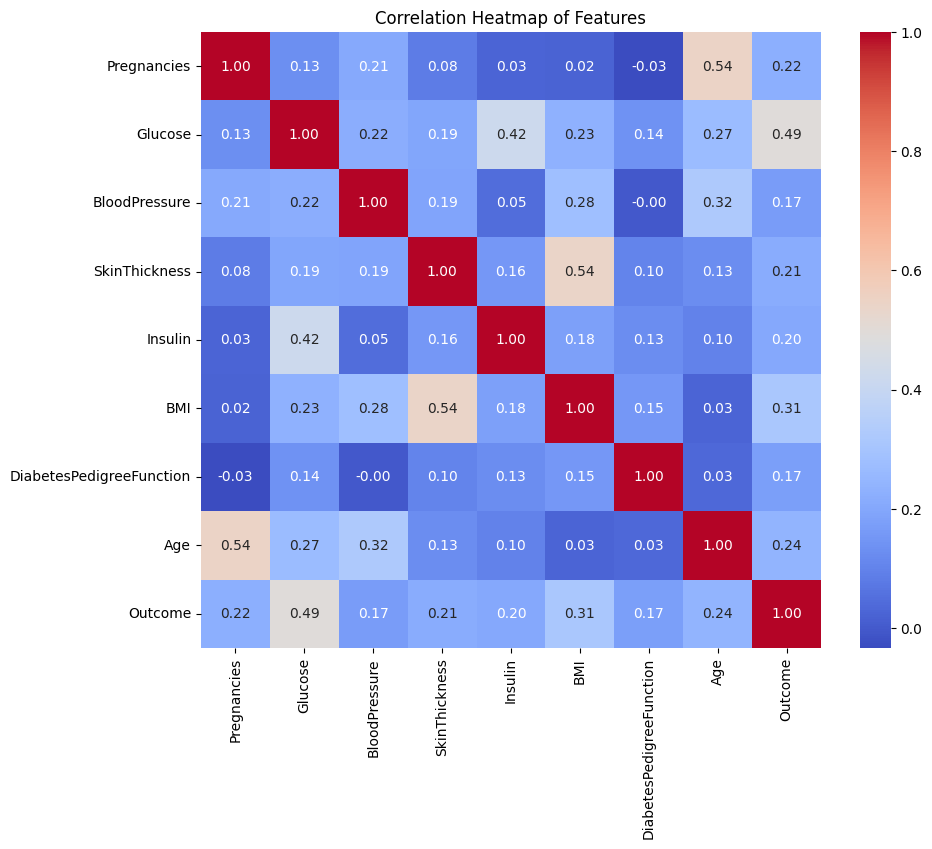

In [8]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()


In [9]:
# BMI categories
bins = [0, 18.5, 25, 30, df['BMI'].max()]
labels = ['Underweight', 'Normal', 'Overweight', 'Obese']
df['BMI_Category'] = pd.cut(df['BMI'], bins=bins, labels=labels, right=False)

# Interaction features
df['Glucose_x_BMI'] = df['Glucose'] * df['BMI']
df['Age_x_BMI'] = df['Age'] * df['BMI']

df[['BMI_Category', 'Glucose_x_BMI', 'Age_x_BMI']].head()


,BMI_Category,Glucose_x_BMI,Age_x_BMI
0,Obese,4972.8,1680.0
1,Overweight,2261.0,824.6
2,Normal,4263.9,745.6
3,Overweight,2500.9,590.1
4,Obese,5904.7,1422.3


In [10]:
# Split by outcome
diabetic = df[df['Outcome'] == 1]
non_diabetic = df[df['Outcome'] == 0]

# T-test
t_stat, p_value = ttest_ind(diabetic['Glucose'], non_diabetic['Glucose'], nan_policy='omit')
t_stat, p_value


(np.float64(15.673795182294105), np.float64(3.1287190418423694e-48))

In [11]:
# Confidence interval for prevalence
n_total = len(df)
n_diabetic = len(diabetic)
proportion_confint(count=n_diabetic, nobs=n_total, alpha=0.05, method='wilson')


(0.3160756659173325, 0.3833444710179449)

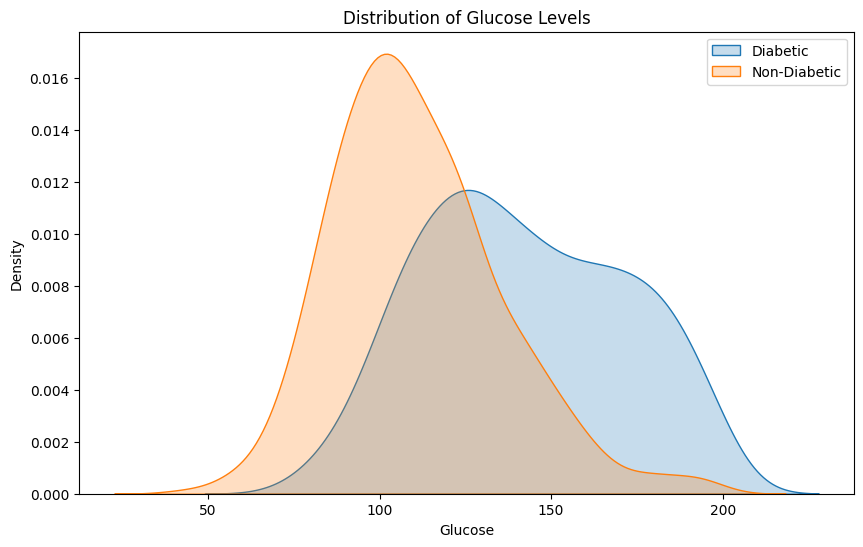

In [12]:
# Distribution plot
plt.figure(figsize=(10, 6))
sns.kdeplot(diabetic['Glucose'], label='Diabetic', fill=True)
sns.kdeplot(non_diabetic['Glucose'], label='Non-Diabetic', fill=True)
plt.title('Distribution of Glucose Levels')
plt.legend()
plt.show()


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

log_reg = LogisticRegression(random_state=42)
naive_bayes = GaussianNB()

models = {'Logistic Regression': log_reg, 'Naive Bayes': naive_bayes}
results = {}


Logistic Regression -> Accuracy: 0.7013, Precision: 0.5870, Recall: 0.5000, F1: 0.5400, ROC-AUC: 0.8128


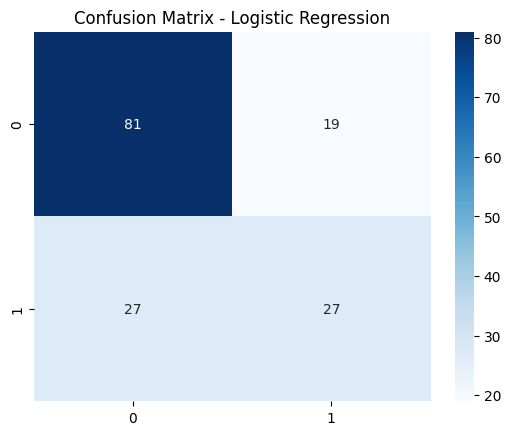

Naive Bayes -> Accuracy: 0.7013, Precision: 0.5667, Recall: 0.6296, F1: 0.5965, ROC-AUC: 0.7646


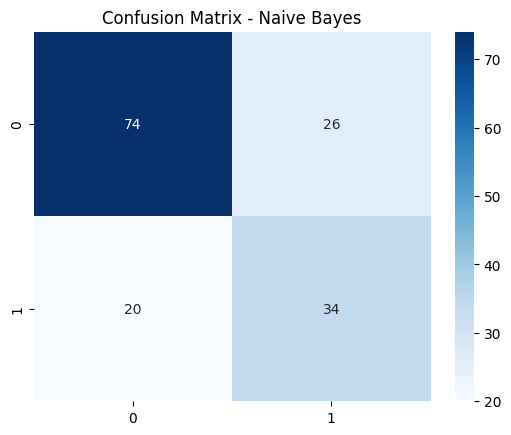

In [14]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_pred_proba = model.predict_proba(X_test)[:, 1]

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred_proba)

    print(f"{name} -> Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, "
          f"F1: {f1:.4f}, ROC-AUC: {roc_auc:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix - {name}')
    plt.show()

    # Cross-validation
    cv_scores = {
        'Accuracy': cross_val_score(model, X, y, cv=5, scoring='accuracy'),
        'Precision': cross_val_score(model, X, y, cv=5, scoring='precision'),
        'Recall': cross_val_score(model, X, y, cv=5, scoring='recall'),
        'F1-Score': cross_val_score(model, X, y, cv=5, scoring='f1'),
        'ROC-AUC': cross_val_score(model, X, y, cv=5, scoring='roc_auc')
    }

    results[name] = {metric: f"{scores.mean():.4f} ± {scores.std():.4f}" for metric, scores in cv_scores.items()}


In [15]:
results_df = pd.DataFrame(results).T
results_df


,Accuracy,Precision,Recall,F1-Score,ROC-AUC
Logistic Regression,0.7722 ± 0.0180,0.7256 ± 0.0444,0.5635 ± 0.0235,0.6334 ± 0.0216,0.8387 ± 0.0294
Naive Bayes,0.7500 ± 0.0238,0.6562 ± 0.0367,0.5971 ± 0.0381,0.6250 ± 0.0357,0.8119 ± 0.0170


In [16]:
# Feature importance (Logistic Regression)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': abs(log_reg.coef_[0])})
feature_importance.sort_values('importance', ascending=False)


,feature,importance
1,Glucose,1.199056
5,BMI,0.693546
0,Pregnancies,0.383407
6,DiabetesPedigreeFunction,0.234030
7,Age,0.147219
4,Insulin,0.072494
2,BloodPressure,0.043332
3,SkinThickness,0.028110
